# Introduction #

#### P.H.A.T. - **P**areto **H**ybrids with **A**symmetric **T**ails ####

The **Phat** distribution is an attempt to address the issues of fat tails in two-tailed data. It is a two-tailed, fully-continuous, well-defined asymmetric power law probability distribution. 

It is a mixture model of two Pareto hybrid distributions, as described in [2009 by Julie Carreau and Yoshua Bengio](https://www.researchgate.net/publication/226293435_A_hybrid_Pareto_model_for_asymmetric_fat-tailed_data_The_univariate_case) with:

+ Gaussian body 
+ distinct Pareto power laws in either tail.

The distribution requires only 4 parameters:

+ $\mu, \sigma$ in the Gaussian body
+ $\xi_{\text{left}}, \xi_{\text{right}}$, being the inverse tail index (1/$\alpha$) for either Paretian tail.

The **phat-tails** package makes available several methods to fit a given time-series dataset to the parameters of the Phat distribution and produce a forecast with the results.

## Installation ##

Installation available via `pip`

```console
$ pip install phat-tails
```

## Quickstart ##

All pertinent classes and functions are imported via the module `phat`.

In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import phat as ph

The probability distribution is found in the main class, `Phat`, which mimics the structure of the [continuous distributions found in scipy.stats](https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html#continuous-distributions-in-scipy-stats). 

We pass the four parameters to instantiate the distribution. For simplicity, we will show the distribution with equal tail indices initially.

In [131]:
mean, sig, shape = 0, 1, 1/5
phat_dist = ph.Phat(mean, sig, shape, shape)

Below is a complete rendering of the distribution, with breakdown among the component Gaussian and Pareto tails.

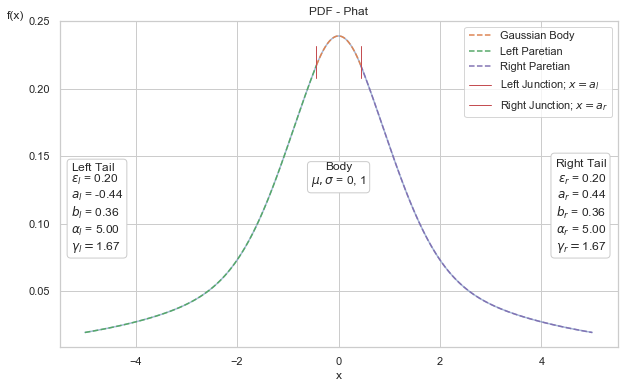

In [132]:
import numpy as np
import scipy.stats as scist
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'whitegrid')

x = np.linspace(-5+mean, 5+mean, 1000)

fig, ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(x, phat_dist.pdf(x), alpha=.5)
x_body = np.linspace(phat_dist.left.a, phat_dist.right.a, 100)
x_left = np.linspace(x[0], phat_dist.left.a, 100)
x_right = np.linspace(phat_dist.right.a, x[-1], 100)
ax1.plot(x_body, phat_dist.pdf(x_body), c='C1', ls='--', label='Gaussian Body')
ax1.plot(x_left, phat_dist.pdf(x_left), c='C2', ls='--', label='Left Paretian')
ax1.plot(x_right, phat_dist.pdf(x_right), c='C4', ls='--', label='Right Paretian')

ax1.axvline(
    phat_dist.left.a, .825, .925, 
    c='r', lw=1, label=r'Left Junction; $x = a_l$')
ax1.axvline(phat_dist.right.a, .825, .925, c='r', lw=1, label=r'Right Junction; $x = a_r$')

paramtxt = 'Body'
paramtxt += '\n'
paramtxt += r'$\mu, \sigma$ = ' + f'{phat_dist.mu:.0f}, {phat_dist.sig:.0f}'

ax1.text(
    .5, .5, paramtxt, ha='center',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)

paramtxt = r'Left Tail$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_{l}$ = ' + f'{phat_dist.left.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$a_l$ = ' + f'{phat_dist.left.a:.2f}'
paramtxt += '\n'
paramtxt += r'$b_l$ = ' + f'{1 / phat_dist.left.b:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_l$ = ' + f'{1 / phat_dist.left.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_l = $' + f'{phat_dist.right.gamma:.2f}'

ax1.text(
    .02,.3, paramtxt,
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
paramtxt = r'Right Tail$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_r$ = ' + f'{phat_dist.right.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$a_r$ = ' + f'{phat_dist.right.a:.2f}'
paramtxt += '\n'
paramtxt += r'$b_r$ = ' + f'{1 / phat_dist.right.b:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_r$ = ' + f'{1 / phat_dist.right.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_r = $' + f'{phat_dist.right.gamma:.2f}'

ax1.text(
    .98,.3, paramtxt, ha='right',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)', loc='top', rotation='horizontal')

ax1.legend()
ax1.set_title('PDF - Phat')

plt.show()

Below we demonstrate the ability to generate asymmetric tails. We overlay two different Phat distributions, one with symmetric tail indices of $\alpha=2$ and the other with *asymmetric* tail indices, $\alpha_{\text{left}}=2$ and $\alpha_{\text{right}}=20$.

We can see that the left tails are identical. In the right tails, the distributions appear to differ only modestly, however, [this difference leads to dramatically different effects](demo.ipynb#Compare-Fit-with-Gaussian-and-T).

In [133]:
mean, sig = 0, 1
shape_l1, shape_r = 1/2, 1/2
dist1 = ph.Phat(mean, sig, shape_l1, shape_r)
shape_l2, shape_r = 1/2, 1/20
dist2 = ph.Phat(mean, sig, shape_l2, shape_r,)

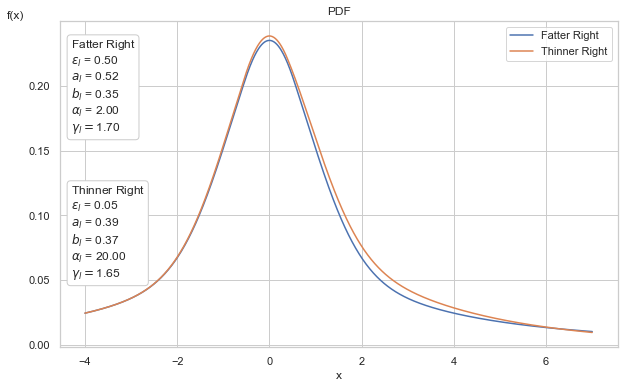

In [134]:
mean, sig = 0, 1
x = np.linspace(-4+mean, 7+mean, 1000)
shape_l1, shape_r = 1/2, 1/2
dist1 = ph.Phat(mean, sig, shape_l1, shape_r)
shape_l2, shape_r = 1/2, 1/20
dist2 = ph.Phat(mean, sig, shape_l2, shape_r,)

fig, ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(x, dist1.pdf(x), label='Fatter Right')
ax1.plot(x, dist2.pdf(x), label='Thinner Right')

paramtxt = r'Fatter Right$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_{l}$ = ' + f'{dist1.right.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$a_l$ = ' + f'{dist1.right.a:.2f}'
paramtxt += '\n'
paramtxt += r'$b_l$ = ' + f'{1 / dist1.right.b:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_l$ = ' + f'{1 / dist1.right.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_l = $' + f'{dist1.right.gamma:.2f}'

ax1.text(
    .02,.95, paramtxt, va='top',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
paramtxt = r'Thinner Right$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_{l}$ = ' + f'{dist2.right.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$a_l$ = ' + f'{dist2.right.a:.2f}'
paramtxt += '\n'
paramtxt += r'$b_l$ = ' + f'{1 / dist2.right.b:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_l$ = ' + f'{1 / dist2.right.xi:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_l = $' + f'{dist2.right.gamma:.2f}'

ax1.text(
    .02,.2, paramtxt, va='bottom',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)', loc='top', rotation='horizontal')

ax1.legend()

ax1.set_title('PDF')

plt.show()

The `Phat` class has common methods such as `pdf`, `cdf`, `sf`, `ppf`. It can also calculate negative log-likelihood and first and second moments. Derivations are [found here](moments.ipynb).

In [135]:
mean, sig, shape_l, shape_r = 0,1, 1/5, 1/4
phat_dist = ph.Phat(mean, sig, shape_l, shape_r)
phat_dist.pdf(10)

array([0.00482994])

In [136]:
phat_dist.cdf([.05,1,-0.1])

array([0.51144212, 0.70624103, 0.47567736])

In [137]:
phat_dist.sf([.05])

array([0.48855788])

In [138]:
assert phat_dist.sf([.05]) == 1 - phat_dist.cdf([.05])

In [139]:
import numpy as np
phat_dist.ppf(np.linspace(0,1,5))

array([       -inf, -1.63735173,  0.00569209,  1.68013031,         inf])

In [140]:
phat_dist.nll(1) # Negative Log-Likelihood

array([1.8510368])

In [141]:
phat_dist.mean()

0.0796142959815449

In [142]:
phat_dist.std()

3.7926873955033087

It can also generate random variables (and standardized random variables).

In [143]:
phat_dist.rvs(20)

array([ 4.10522047,  3.55472489, -0.93678543,  0.51636282,  1.34579594,
        1.01540556, -0.80886831, -0.67534635,  0.09117024,  6.42834252,
        0.35292732,  3.1609973 ,  4.03059888,  5.0758071 , -3.4068779 ,
       -0.5631759 ,  0.76542791, -6.26470075, -5.32952901,  0.60021098])

In [144]:
phat_dist.std_rvs(20)

array([-0.12796173,  0.43906166, -0.737519  , -0.51000483,  0.17890436,
       -0.08411178,  0.28586079, -0.2721797 , -0.22500339,  0.22734977,
       -0.25146567,  0.64438798, -1.50587683,  0.1999281 , -0.29127155,
        0.35417953, -0.01986807,  0.5101493 ,  0.59852587, -0.38408617])

Importantly, Phat captures the undefined moments that result when $\alpha < 2$.

In [145]:
shape_l, shape_r, mean, sig = 1, 1, 0, 1
phat_dist = ph.Phat(mean, sig, shape_l, shape_r)

In [146]:
phat_dist.mean()

/Users/spindicate/Documents/programming/investing/analysis/options/phat/src/phat/utils.py:75: RuntimeWarning: invalid value encountered in matmul
  return (self.p @ stack)


nan

In [147]:
phat_dist.var()

nan

`Phat` has a `fit` method, which generates a [standard Maximum Likelihood Estimate (MLE)](mle_fit.ipynb), *although this is not the recommended approach to fitting this distribution*.

In addition to the main distribution class, the package also provides:

+ `ph.two_tailed_hill_double_bootstrap`: [a method for estimating both tail indices of a dataset simultaneously](dblbs.ipynb)
+ `ph.PhatNet`: [a simple neural network that provides improved fit relative to MLE](nn_fit.ipynb), which includes a custom loss function called `PhatLoss`.
+ `ph.Garchcaster`: [a class for generating time-series forecasts from ARMA and GARCH models that incorporates Phat random innovations](phatgarch.ipynb).

## Dependencies ##

+ Python versions: 3.9
+ numpy 1.19.5
+ numba 0.53.*
+ scipy 1.7.*
+ scikit-learn 0.24.*
+ statsmodels 0.12.*
+ tensorflow 2.5.0
+ tensorflow-probability 0.12.2
+ matplotlib 3.5.1
+ arch 4.19
+ pmdarima 1.8.2
+ tqdm 4.61.2

Also see requirements and compatibility specifications for [Tensorflow](https://www.tensorflow.org/install) and [Numba](https://numba.readthedocs.io/en/stable/user/installing.html)

### Suggested ###
+ [tensorboard](https://www.tensorflow.org/tensorboard/get_started): monitoring tool for tensorflow
+ [yfinance](https://github.com/ranaroussi/yfinance): for downloading historical price data

### Also Check Out ###

+ [tail-estimation](https://github.com/ivanvoitalov/tail-estimation)
    + built as part of [Ivan Voitalov et al (2019)](https://journals.aps.org/prresearch/pdf/10.1103/PhysRevResearch.1.033034) on tail index estimation techniques for power law phenomenon in scale-free networks
    + code from this package is utilized in the `two_tailed_hill_double_bootstrap` function
+ [thresholdmodeling](https://github.com/iagolemos1/thresholdmodeling) for a package on manual Peak-over-Threshold (PoT) analysis.

## Enhancements ##

Potential enhancements under consideration:

+ truncated Pareto tails
+ additional tail index estimation techniques
+ integration with Heston or other stochastic volatility models
+ incorporation of Phat innovations into `fit` of AR-GARCH or ARMA-GARCH via custom model
+ generalization to additional GARCH models
+ better optimization of `Garchcaster.forecast` method